In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import scipy.stats as stats
from yellowbrick.regressor import AlphaSelection, PredictionError, ResidualsPlot
from yellowbrick.model_selection import FeatureImportances
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, ElasticNetCV, Lasso, LassoCV
from sklearn.model_selection import cross_validate, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [4]:
df = pd.read_csv("PAYROL_NY_STATE.csv")

In [5]:
df.head()

NAME                             OFFICE  \
0      ABBOT, JUDITH L          SENATOR TOBY ANN STAVISKY   
1       ABREU, BRIAN A      LEGISLATIVE MESSENGER SERVICE   
2       ABREU, TYDIE Z  SENATE FINANCE COMMITTEE/MAJORITY   
3  ACEVEDO, SAMANTHA I              SENATOR JESSICA RAMOS   
4       ADAMS, DAVID V            SENATE SERGEANT-AT-ARMS   

                                  TITLE      CITY  BIWEEKLT/HOURLY RATE  \
0                     COMMUNITY LIAISON  FLUSHING               1076.93   
1                             MESSENGER    ALBANY               1173.93   
2                        SENIOR ANALYST    ALBANY               2692.31   
3  SR. DIR. LEG. AFFRS / COMMITTEE DIR.    ALBANY               2307.70   
4              SESSION SERGEANT-AT-ARMS    ALBANY                820.95   

  PAYROL TYPE  PAY PERIOD          LEGISLATIVE ENTITY  
0          SA           4             SENATE EMPLOYEE  
1          RA           4  JOINT LEGISLATIVE EMPLOYEE  
2          RA           4             SENATE EMPLOYEE  
3          RA           4             SENATE EMPLOYEE  
4          SA           4             SENATE EMPLOYEE

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   NAME                  1000 non-null   object 
 1   OFFICE                1000 non-null   object 
 2   TITLE                 1000 non-null   object 
 3   CITY                  1000 non-null   object 
 4   BIWEEKLT/HOURLY RATE  1000 non-null   float64
 5   PAYROL TYPE           1000 non-null   object 
 6   PAY PERIOD            1000 non-null   int64  
 7   LEGISLATIVE ENTITY    1000 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 62.6+ KB


In [7]:
df.shape

(1000, 8)

In [8]:
for column in df.select_dtypes('object').columns:
    print(f'Column {column} has {df[column].nunique()} unique values.')

Column NAME has 1000 unique values.
Column OFFICE has 114 unique values.
Column TITLE has 429 unique values.
Column CITY has 55 unique values.
Column PAYROL TYPE has 3 unique values.
Column LEGISLATIVE ENTITY has 2 unique values.


In [10]:
df['PAY PERIOD'].nunique()

1

In [11]:
df.describe()

BIWEEKLT/HOURLY RATE  PAY PERIOD
count           1000.000000      1000.0
mean            2129.122080         4.0
std             1144.883266         0.0
min               11.100000         4.0
25%             1423.080000         4.0
50%             1923.080000         4.0
75%             2692.310000         4.0
max             7115.390000         4.0

In [12]:
pd.qcut(df['BIWEEKLT/HOURLY RATE'].sort_values(), q=4).value_counts()

(11.099, 1423.08]     253
(1423.08, 1923.08]    249
(1923.08, 2692.31]    249
(2692.31, 7115.39]    249
Name: BIWEEKLT/HOURLY RATE, dtype: int64

In [8]:
df[df['BIWEEKLT/HOURLY RATE'] < 200]

NAME                             OFFICE  \
15    ALEXANDER, ANDREA J      LEGISLATIVE MESSENGER SERVICE   
21      ALLAIN, MICHAEL R            SENATOR KEVIN M. THOMAS   
45      ASHLAW, RICHARD L           SENATOR JOSEPH A. GRIFFO   
110        BOONE, KEVIN D            SENATOR KEVIN M. THOMAS   
135       BULGIA, CARLY E               SENATOR SUSAN SERINO   
182        CHEUNG, LANA S             SENATOR BRIAN KAVANAGH   
200  COLLINGS, MONTYNAL B              SENATOR JAMAAL BAILEY   
234   CULBERTSON, JAMES A           57TH SENATORIAL DISTRICT   
246       DAVIE, DUNCAN S            SENATOR JAMES L. SEWARD   
269      DEWAN, DEBORAH M                SENATOR JEN METZGER   
290     DOWNS, TIFFANIE A               SENATOR SUSAN SERINO   
302      DURKISH, JAMES A           SENATOR JOSEPH A. GRIFFO   
332         EVANS, JOHN D           SENATOR JOSEPH A. GRIFFO   
338    FANELLI, KENNETH J           SENATOR JOSEPH A. GRIFFO   
363      FISCHER, HENRY M      LEGISLATIVE MESSENGER SERVICE   
386    FROHBERG, LESLIE G              SENATOR JAMAAL BAILEY   
401    GARDNER, STEPHEN J   STS/BUSINESS APPLICATIONS CENTER   
425      GODWIN, AUBREY D                SENATOR ROBERT ORTT   
498      HILTS, WILLIAM R                SENATOR ROBERT ORTT   
503      HOLDEN, ALEXIA L              SENATOR JAMES SKOUFIS   
510       HOWARD, KAREN M        SENATOR PATRICK M. GALLIVAN   
546         KASH, JANET K     SENATOR JOSEPH P. ADDABBO, JR.   
646        MALONE, THEO R        SENATOR ROBERT E. ANTONACCI   
656        MAROUN, PAUL A      SENATOR ELIZABETH 0'C. LITTLE   
669     MASSRY, MALLORY B              SENATOR DAPHNE JORDAN   
672        MAYER, DONNA L            SENATE PERSONNEL OFFICE   
702    MEIER, MADELEINE G           SENATOR THOMAS F. O'MARA   
719     MILLER, RICHARD A           SENATOR JOSEPH A. GRIFFO   
767       NATOLI, DAVID J               SENATE FISCAL OFFICE   
799      OLIVER, JUNEAY L      SENATOR VELMANETTE MONTGOMERY   
810   PALESANO, MATTHEW J            SENATOR ANDREW J. LANZA   
850    PLATTNER, ROBERT D  SENATE FINANCE COMMITTEE/MAJORITY   
878       RANSOM, NOLAN T           SENATOR JOSEPH E. ROBACH   
883     RAZZORE, ANDREW D            SENATOR ANDREW J. LANZA   
897      REIMER, NICOLE E      LEGISLATIVE MESSENGER SERVICE   
928       ROSS, WILLIAM L                SENATOR ROBERT ORTT   
940          SACK, MARY E   SECRETARY OF THE SENATE'S OFFICE   

                                 TITLE           CITY  BIWEEKLT/HOURLY RATE  \
15                MESSENGER APPRENTICE         ALBANY                 11.10   
21                        SESSION AIDE         ALBANY                 16.00   
45          CONSTITUENT REPRESENTATIVE        MASSENA                192.31   
110   COMMUNITY AFFAIRS REPRESENTATIVE         ALBANY                 15.00   
135  SENIOR SPECIAL EVENTS COORDINATOR      HYDE PARK                 20.00   
182                  COMMUNITY LIAISON       NEW YORK                 76.93   
200                  COMMUNITY LIAISON          BRONX                 15.00   
234                  COMMUNITY LIAISON          OLEAN                192.31   
246                     CHIEF OF STAFF        ONEONTA                 55.00   
269                 AG LIAISON-ADVISOR         ALBANY                 40.00   
290                EXECUTIVE ASSISTANT      HYDE PARK                 19.00   
302         CONSTITUENT REPRESENTATIVE       LOWVILLE                192.31   
332                     SENIOR ADVISOR         ALBANY                 45.00   
338         CONSTITUENT REPRESENTATIVE          UTICA                 13.00   
363               MESSENGER APPRENTICE         ALBANY                 11.10   
386                      SENIOR LIASON          BRONX                 16.00   
401             DATABASE ADMINISTRATOR         ALBANY                 73.50   
425         CONSTITUENT RELATIONS AIDE       LOCKPORT                 15.00   
498           COMMUNITY REPRESENTATIVE       LOCKPORT                 15.30   
503     

In [13]:
df[df['BIWEEKLT/HOURLY RATE'] < 200].shape

(37, 8)

In [14]:
df['BIWEEKLT/HOURLY RATE'] = df['BIWEEKLT/HOURLY RATE'].map(lambda x: x*80 if x<200 else x)

In [15]:
df['BIWEEKLT/HOURLY RATE'].min()

230.77

In [16]:
df = df[~df['BIWEEKLT/HOURLY RATE'].transform(lambda x: abs(x-x.mean()) > 1.96*x.std()).values]

In [17]:
df.shape

(963, 8)

In [ ]:
df.columns = df.columns.str.capitalize()

In [18]:
df.tail()

NAME                      OFFICE  \
995       SHROUT, JACKSON K       SENATOR TODD KAMINSKY   
996    SHUFON JR, ANTHONY A      SS/PRODUCTION SERVICES   
997      SHUTTER, WILLIAM J      SS/PRODUCTION SERVICES   
998      SIERZEGA, KIMBERLY  SENATE TECHNOLOGY SERVICES   
999  SILVERSTEIN, CHARLES P    MINORITY COUNSEL/PROGRAM   

                                    TITLE              CITY  \
995                     COMMUNITY LIAISON  ROCKVILLE CENTRE   
996                          DATA ANALYST            ALBANY   
997                   MAILING OPERATOR II            ALBANY   
998  SENIOR OFFICE SUPPORT REPRESENTATIVE            ALBANY   
999                   LEGISLATIVE ANALYST            ALBANY   

     BIWEEKLT/HOURLY RATE PAYROL TYPE  PAY PERIOD LEGISLATIVE ENTITY  
995               1538.47          RA           4    SENATE EMPLOYEE  
996               2180.24          RA           4    SENATE EMPLOYEE  
997               1770.23          RA           4    SENATE EMPLOYEE  
998               2917.25          RA           4    SENATE EMPLOYEE  
999               1923.08          RA           4    SENATE EMPLOYEE

In [19]:
df.reset_index(drop=True, inplace=True)

In [20]:
df.head()

NAME                             OFFICE  \
0      ABBOT, JUDITH L          SENATOR TOBY ANN STAVISKY   
1       ABREU, BRIAN A      LEGISLATIVE MESSENGER SERVICE   
2       ABREU, TYDIE Z  SENATE FINANCE COMMITTEE/MAJORITY   
3  ACEVEDO, SAMANTHA I              SENATOR JESSICA RAMOS   
4       ADAMS, DAVID V            SENATE SERGEANT-AT-ARMS   

                                  TITLE      CITY  BIWEEKLT/HOURLY RATE  \
0                     COMMUNITY LIAISON  FLUSHING               1076.93   
1                             MESSENGER    ALBANY               1173.93   
2                        SENIOR ANALYST    ALBANY               2692.31   
3  SR. DIR. LEG. AFFRS / COMMITTEE DIR.    ALBANY               2307.70   
4              SESSION SERGEANT-AT-ARMS    ALBANY                820.95   

  PAYROL TYPE  PAY PERIOD          LEGISLATIVE ENTITY  
0          SA           4             SENATE EMPLOYEE  
1          RA           4  JOINT LEGISLATIVE EMPLOYEE  
2          RA           4             SENATE EMPLOYEE  
3          RA           4             SENATE EMPLOYEE  
4          SA           4             SENATE EMPLOYEE

In [21]:
df.columns = df.columns.str.capitalize()

In [22]:
df.head()

Name                             Office  \
0      ABBOT, JUDITH L          SENATOR TOBY ANN STAVISKY   
1       ABREU, BRIAN A      LEGISLATIVE MESSENGER SERVICE   
2       ABREU, TYDIE Z  SENATE FINANCE COMMITTEE/MAJORITY   
3  ACEVEDO, SAMANTHA I              SENATOR JESSICA RAMOS   
4       ADAMS, DAVID V            SENATE SERGEANT-AT-ARMS   

                                  Title      City  Biweeklt/hourly rate  \
0                     COMMUNITY LIAISON  FLUSHING               1076.93   
1                             MESSENGER    ALBANY               1173.93   
2                        SENIOR ANALYST    ALBANY               2692.31   
3  SR. DIR. LEG. AFFRS / COMMITTEE DIR.    ALBANY               2307.70   
4              SESSION SERGEANT-AT-ARMS    ALBANY                820.95   

  Payrol type  Pay period          Legislative entity  
0          SA           4             SENATE EMPLOYEE  
1          RA           4  JOINT LEGISLATIVE EMPLOYEE  
2          RA           4             SENATE EMPLOYEE  
3          RA           4             SENATE EMPLOYEE  
4          SA           4             SENATE EMPLOYEE

In [23]:
for col in df.columns:
  print(f"{col} has {df[col].nunique()} unique items")
  if df[col].nunique() == 1 or df[col].nunique() == 963:
    print(f"\nyou can drop {col} feature \n")

Name has 963 unique items

you can drop Name feature 

Office has 112 unique items
Title has 406 unique items
City has 53 unique items
Biweeklt/hourly rate has 417 unique items
Payrol type has 3 unique items
Pay period has 1 unique items

you can drop Pay period feature 

Legislative entity has 2 unique items


In [24]:
df1 = df.drop(["Name", "Pay period"], axis= 1).copy()

In [25]:
df1.head()

Office                                 Title  \
0          SENATOR TOBY ANN STAVISKY                     COMMUNITY LIAISON   
1      LEGISLATIVE MESSENGER SERVICE                             MESSENGER   
2  SENATE FINANCE COMMITTEE/MAJORITY                        SENIOR ANALYST   
3              SENATOR JESSICA RAMOS  SR. DIR. LEG. AFFRS / COMMITTEE DIR.   
4            SENATE SERGEANT-AT-ARMS              SESSION SERGEANT-AT-ARMS   

       City  Biweeklt/hourly rate Payrol type          Legislative entity  
0  FLUSHING               1076.93          SA             SENATE EMPLOYEE  
1    ALBANY               1173.93          RA  JOINT LEGISLATIVE EMPLOYEE  
2    ALBANY               2692.31          RA             SENATE EMPLOYEE  
3    ALBANY               2307.70          RA             SENATE EMPLOYEE  
4    ALBANY                820.95          SA             SENATE EMPLOYEE

In [26]:
(df1.Title.value_counts()==1).sum()

283

/home/kurubal/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Biweeklt/hourly rate', ylabel='Density'>

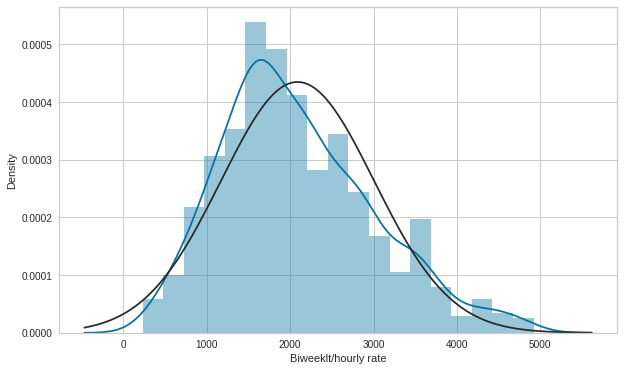

In [30]:
plt.figure(figsize=(10, 6))
sns.distplot(df1['Biweeklt/hourly rate'], fit=stats.norm)

In [ ]:
list_of_least_title = []
for i in df1.Title.unique():
  if df.Title.value_counts()[i] < 2 :
    list_of_least_title.append(i)

In [31]:
stats.skew(df1['Biweeklt/hourly rate'])

0.6036242553202789

In [32]:
list_of_least_title = []
for i in df1.Title.unique():
  if df.Title.value_counts()[i] < 2 :
    list_of_least_title.append(i)

In [33]:
df1[df1.Title.isin(list_of_least_title)]

Office                                 Title  \
3           SENATOR JESSICA RAMOS  SR. DIR. LEG. AFFRS / COMMITTEE DIR.   
10     SENATE TECHNOLOGY SERVICES      TECHNICAL SUPPORT REPRESENTATIVE   
13          SENATOR JESSICA RAMOS  DISTRICT POLICY & ORGANIZING DIRECTO   
20   MAJORITY CONFERENCE SERVICES   EXTERNAL RELATIONS LEGISLATIVE AIDE   
31           SENATOR SUSAN SERINO           DISTRICT OFFICE COORDINATOR   
..                            ...                                   ...   
947         SENATOR JAMES SANDERS                          TEAM COUNSEL   
948        SENATOR ANNA M. KAPLAN                CHIEF OF STAFF/COUNSEL   
950        SENATE M&O/POST OFFICE                            POSTMASTER   
952      MAJORITY COUNSEL/PROGRAM                      POLICY ASSISTANT   
960        SS/PRODUCTION SERVICES                   MAILING OPERATOR II   

              City  Biweeklt/hourly rate Payrol type Legislative entity  
3           ALBANY               2307.70          RA    SENATE EMPLOYEE  
10          ALBANY               1307.70          RA    SENATE EMPLOYEE  
13   EAST ELMHURST               2000.00          RA    SENATE EMPLOYEE  
20          ALBANY               2115.39          SA    SENATE EMPLOYEE  
31   PUTNAM VALLEY               2307.70          RA    SENATE EMPLOYEE  
..             ...                   ...         ...                ...  
947         ALBANY               2500.00          RA    SENATE EMPLOYEE  
948         ALBANY               4615.39          RA    SENATE EMPLOYEE  
950         ALBANY               2628.45          RA    SENATE EMPLOYEE  
952         ALBANY               1538.47          RA    SENATE EMPLOYEE  
960         ALBANY               1770.23          RA    SENATE EMPLOYEE  

[283 rows x 6 columns]

In [34]:
df.head()

Name                             Office  \
0      ABBOT, JUDITH L          SENATOR TOBY ANN STAVISKY   
1       ABREU, BRIAN A      LEGISLATIVE MESSENGER SERVICE   
2       ABREU, TYDIE Z  SENATE FINANCE COMMITTEE/MAJORITY   
3  ACEVEDO, SAMANTHA I              SENATOR JESSICA RAMOS   
4       ADAMS, DAVID V            SENATE SERGEANT-AT-ARMS   

                                  Title      City  Biweeklt/hourly rate  \
0                     COMMUNITY LIAISON  FLUSHING               1076.93   
1                             MESSENGER    ALBANY               1173.93   
2                        SENIOR ANALYST    ALBANY               2692.31   
3  SR. DIR. LEG. AFFRS / COMMITTEE DIR.    ALBANY               2307.70   
4              SESSION SERGEANT-AT-ARMS    ALBANY                820.95   

  Payrol type  Pay period          Legislative entity  
0          SA           4             SENATE EMPLOYEE  
1          RA           4  JOINT LEGISLATIVE EMPLOYEE  
2          RA           4             SENATE EMPLOYEE  
3          RA           4             SENATE EMPLOYEE  
4          SA           4             SENATE EMPLOYEE

In [35]:
df2 = pd.get_dummies(df1, drop_first=True)

In [36]:
df2.head()

Biweeklt/hourly rate  Office_CH/DOCUMENT ROOM  \
0               1076.93                        0   
1               1173.93                        0   
2               2692.31                        0   
3               2307.70                        0   
4                820.95                        0   

   Office_CH/JOURNAL CLERK'S OFFICE  Office_FO/ACCOUNTS PAYABLE  \
0                                 0                           0   
1                                 0                           0   
2                                 0                           0   
3                                 0                           0   
4                                 0                           0   

   Office_FO/PAYROLL  Office_LC/DEVELOPMENT OF RURAL RESOURCES  \
0                  0                                         0   
1                  0                                         0   
2                  0                                         0   
3                  0                                         0   
4                  0                                         0   

   Office_LC/LEGISLATIVE ETHICS COMMISSION  Office_LEGISLATIVE HEALTH SERVICE  \
0                                        0                                  0   
1                                        0                                  0   
2                                        0                                  0   
3                                        0                                  0   
4                                        0                                  0   

   Office_LEGISLATIVE LIBRARY  Office_LEGISLATIVE MESSENGER SERVICE  ...  \
0                           0                                     0  ...   
1                           0                                     1  ...   
2                           0                                     0  ...   
3                           0                                     0  ...   
4                           0                                     0  ...   

   City_STATEN ISLAND  City_SYOSSET  City_SYRACUSE  City_UTICA  \
0                   0             0              0           0   
1                   0             0              0           0   
2                   0             0              0           0   
3                   0             0              0           0   
4                   0             0              0           0   

   City_WATERTOWN  City_WILLIAMSVILLE  City_YONKERS  Payrol type_SA  \
0               0                   0             0               1   
1               0                   0             0               0   
2               0                   0             0               0   
3               0                   0             0               0   
4               0                   0             0               1   

   Payrol type_TE  Legislative entity_SENATE EMPLOYEE  
0               0                                   1  
1               0                                   0  
2               0                                   1  
3               0                                   1  
4               0                                   1  

[5 rows x 572 columns]

In [37]:
def print_evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')

In [38]:
X = df2.drop("Biweeklt/hourly rate", axis=1)
y = df2["Biweeklt/hourly rate"] 

In [39]:
X.shape

(963, 571)

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Linear Regression

In [46]:
lin_model = LinearRegression()

In [47]:
lin_model.fit(X_train, y_train)

LinearRegression()

In [48]:
lin_model.score(X_train, y_train)

0.9287961882422644

In [49]:
lin_model.score(X_test, y_test)

-1.4764982217080726e+26

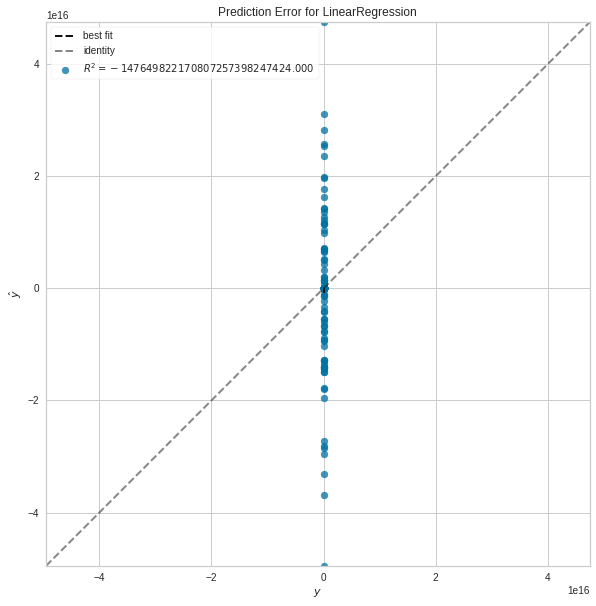

<AxesSubplot:title={'center':'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [50]:
plt.figure(figsize=(10, 10))
visualizer = PredictionError(LinearRegression())
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

In [51]:
lin_model.intercept_

-6780203769347701.0

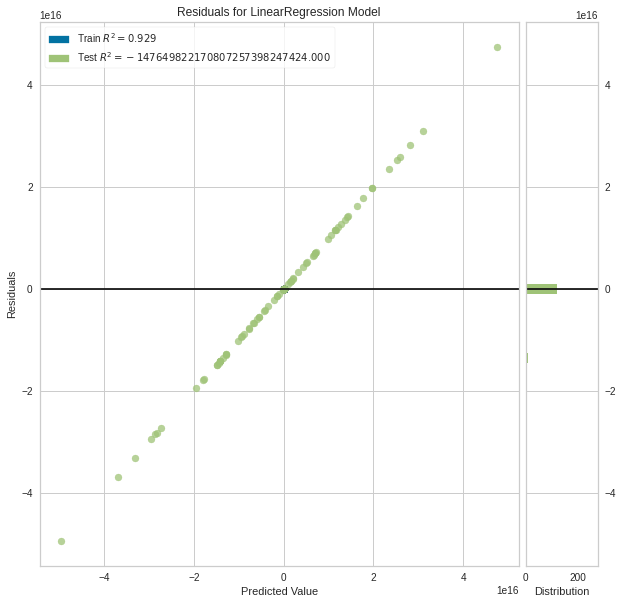

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [52]:
plt.figure(figsize=(10, 10))
model = ResidualsPlot(LinearRegression())
model.fit(X_train, y_train)
model.score(X_test, y_test)
model.show()

### Ridge Regression

In [53]:
ridge_model = Ridge(random_state=42)

In [54]:
ridge_model.fit(X_train, y_train)

Ridge(random_state=42)

In [55]:
ridge_model.score(X_train, y_train)

0.849483100030242

In [56]:
ridge_model.score(X_test, y_test)

0.3699609114390163

In [57]:
scores = cross_validate(Ridge(random_state=42), X_train, y_train, scoring=['r2',
                                                          'neg_mean_absolute_error',
                                                          'neg_mean_squared_error',
                                                          'neg_root_mean_squared_error'], cv=10)

In [58]:
pd.DataFrame(scores)['test_r2'].mean()

0.5278337115763038

### Alpha Tuning

In [59]:
alpha_space = np.linspace(0.01, 20, 300)

In [60]:
ridgecv = RidgeCV(alphas=alpha_space, cv=10)

In [61]:
ridgecv.fit(X_train, y_train)

RidgeCV(alphas=array([1.00000000e-02, 7.68561873e-02, 1.43712375e-01, 2.10568562e-01,
       2.77424749e-01, 3.44280936e-01, 4.11137124e-01, 4.77993311e-01,
       5.44849498e-01, 6.11705686e-01, 6.78561873e-01, 7.45418060e-01,
       8.12274247e-01, 8.79130435e-01, 9.45986622e-01, 1.01284281e+00,
       1.07969900e+00, 1.14655518e+00, 1.21341137e+00, 1.28026756e+00,
       1.34712375e+00, 1.41397993e+0...
       1.84623077e+01, 1.85291639e+01, 1.85960201e+01, 1.86628763e+01,
       1.87297324e+01, 1.87965886e+01, 1.88634448e+01, 1.89303010e+01,
       1.89971572e+01, 1.90640134e+01, 1.91308696e+01, 1.91977258e+01,
       1.92645819e+01, 1.93314381e+01, 1.93982943e+01, 1.94651505e+01,
       1.95320067e+01, 1.95988629e+01, 1.96657191e+01, 1.97325753e+01,
       1.97994314e+01, 1.98662876e+01, 1.99331438e+01, 2.00000000e+01]),
        cv=10)

In [62]:
ridgecv.best_score_

0.5284042000334062

In [63]:
ridgecv.alpha_

1.2134113712374581

In [64]:
ridgecv.score(X_train, y_train)

0.8345220419861044

In [65]:
ridgecv.score(X_test, y_test)

0.36962502932487074

In [66]:
ridge_2 = Ridge(alpha=1.2134113712374581, random_state=42)

In [67]:
ridge_2.fit(X_train, y_train)

Ridge(alpha=1.2134113712374581, random_state=42)

In [68]:
ridge_2.score(X_train, y_train)

0.8345220419861044

In [69]:
ridge_2.score(X_test, y_test)

0.36962502932487074

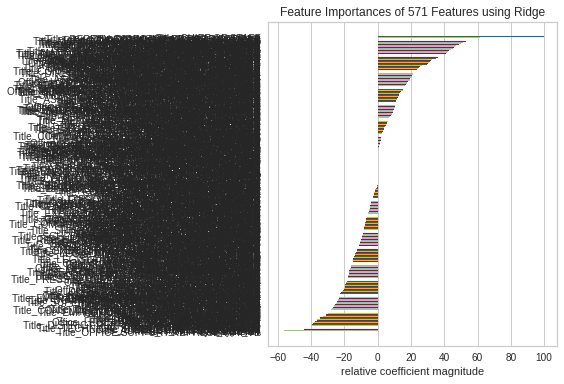

<AxesSubplot:title={'center':'Feature Importances of 571 Features using Ridge'}, xlabel='relative coefficient magnitude'>

In [70]:
viz = FeatureImportances(Ridge(alpha=1.414, random_state=42), labels=X.columns)
viz.fit(X_train, y_train)
viz.show()

In [71]:
y_pred = ridge_2.predict(X_test)

/home/kurubal/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


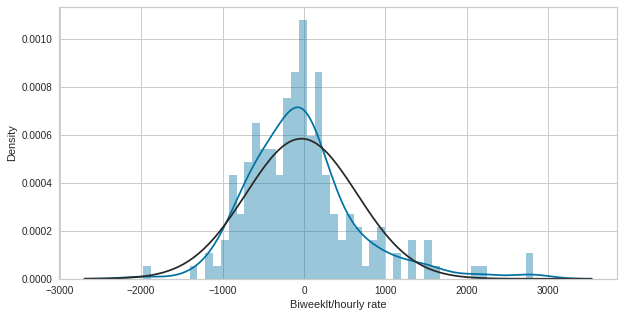

In [72]:
plt.figure(figsize=(10, 5))
sns.distplot((y_test - y_pred), bins=50, fit=stats.norm);

In [73]:
stats.skew(y_test - y_pred)

1.178311029527346

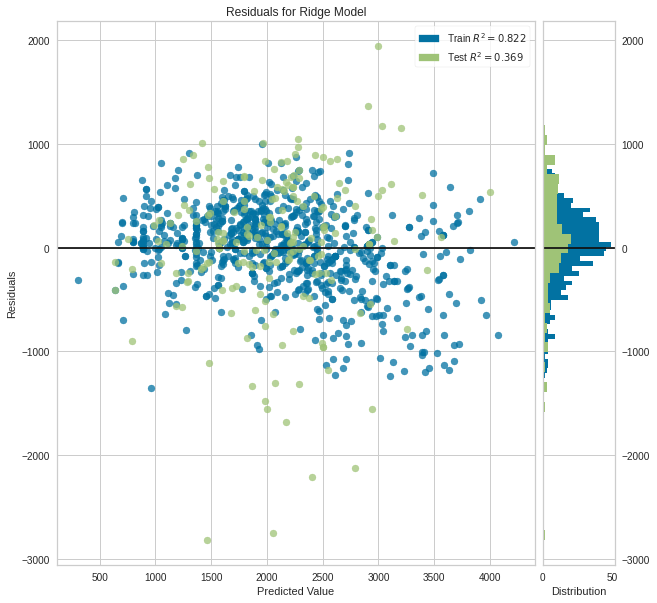

<AxesSubplot:title={'center':'Residuals for Ridge Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [74]:
plt.figure(figsize=(10, 10))
model = ResidualsPlot(Ridge(alpha=1.414, random_state=42))
model.fit(X_train, y_train)
model.score(X_test, y_test)
model.show()

### Lasso Regression

In [75]:
lasso_model = Lasso(random_state=42)

In [76]:
lasso_model.fit(X_train, y_train)

Lasso(random_state=42)

In [77]:
lasso_model.score(X_train, y_train)

0.7823697667590425

In [78]:
lasso_model.score(X_test, y_test)

0.34508278440808093

In [79]:
scores = cross_validate(Lasso(random_state=42), X_train, y_train, scoring=['r2',
                                                          'neg_mean_absolute_error',
                                                          'neg_mean_squared_error',
                                                          'neg_root_mean_squared_error'], cv=10)

In [80]:
pd.DataFrame(scores)

fit_time  score_time   test_r2  test_neg_mean_absolute_error  \
0  0.014978    0.004130  0.718153                   -368.244571   
1  0.025162    0.011690  0.409856                   -554.501431   
2  0.023292    0.004656  0.542147                   -506.954329   
3  0.015154    0.005034  0.436698                   -477.392641   
4  0.016828    0.004681  0.365513                   -561.525939   
5  0.015375    0.004674  0.587852                   -475.459911   
6  0.018722    0.004661  0.457776                   -516.439232   
7  0.016100    0.004645  0.379154                   -554.735753   
8  0.014161    0.004717  0.501041                   -442.879757   
9  0.017675    0.004664  0.557860                   -440.099454   

   test_neg_mean_squared_error  test_neg_root_mean_squared_error  
0               -211312.530640                       -459.687427  
1               -498431.616180                       -705.996895  
2               -472459.070815                       -687.356582  
3               -499357.495211                       -706.652316  
4               -530058.079416                       -728.050877  
5               -379415.239619                       -615.966914  
6               -500627.159187                       -707.550111  
7               -583625.585610                       -763.953916  
8               -346693.555368                       -588.806891  
9               -341715.632904                       -584.564481

In [81]:
pd.DataFrame(scores)['test_r2'].mean()

0.4956048610289403

In [82]:
lasso_cv_model = LassoCV(alphas = alpha_space, cv=10, max_iter=100000, n_jobs =-1, random_state=42).fit(X_train, y_train)

In [83]:
lasso_cv_model.alpha_

0.8122742474916388

In [84]:
lasso_cv_model.score(X_train, y_train)

0.8135192860443252

In [85]:
lasso_cv_model.score(X_test, y_test)

0.35556318161579314

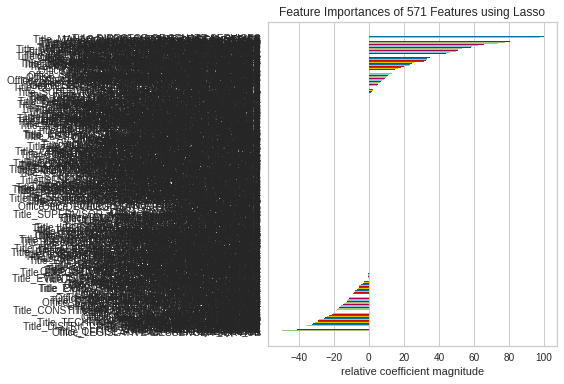

<AxesSubplot:title={'center':'Feature Importances of 571 Features using Lasso'}, xlabel='relative coefficient magnitude'>

In [86]:
viz = FeatureImportances(Lasso(alpha=0.8791304347826087, random_state=42), labels=X.columns)
viz.fit(X_train, y_train)
viz.show()

### ElasticNet

In [87]:
elm = ElasticNet(alpha=0.1, l1_ratio=0.9, selection='random', random_state=42)

In [88]:
elm.fit(X_train, y_train)

ElasticNet(alpha=0.1, l1_ratio=0.9, random_state=42, selection='random')

In [89]:
elm.score(X_train, y_train)

0.6302576586179983

In [90]:
elm.score(X_test, y_test)

0.31930731289999614

In [91]:
grid_params = {'alpha':alpha_space, 'l1_ratio':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}

In [92]:
grid = GridSearchCV(ElasticNet(), param_grid=grid_params, n_jobs=-1, verbose=2, cv=10)

In [93]:
grid.fit(X_train, y_train)

Fitting 10 folds for each of 2700 candidates, totalling 27000 fits


GridSearchCV(cv=10, estimator=ElasticNet(), n_jobs=-1,
             param_grid={'alpha': array([1.00000000e-02, 7.68561873e-02, 1.43712375e-01, 2.10568562e-01,
       2.77424749e-01, 3.44280936e-01, 4.11137124e-01, 4.77993311e-01,
       5.44849498e-01, 6.11705686e-01, 6.78561873e-01, 7.45418060e-01,
       8.12274247e-01, 8.79130435e-01, 9.45986622e-01, 1.01284281e+00,
       1.07969900e+00, 1.14655518e+00, 1...
       1.87297324e+01, 1.87965886e+01, 1.88634448e+01, 1.89303010e+01,
       1.89971572e+01, 1.90640134e+01, 1.91308696e+01, 1.91977258e+01,
       1.92645819e+01, 1.93314381e+01, 1.93982943e+01, 1.94651505e+01,
       1.95320067e+01, 1.95988629e+01, 1.96657191e+01, 1.97325753e+01,
       1.97994314e+01, 1.98662876e+01, 1.99331438e+01, 2.00000000e+01]),
                         'l1_ratio': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                      0.9]},
             verbose=2)

In [94]:
grid.best_params_

{'alpha': 0.01, 'l1_ratio': 0.8}

In [95]:
grid.best_score_

0.5281738555413359